# Thực hành 


In [45]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
%matplotlib inline
#plt.gray()


## Phát sinh dữ liệu

## KMeans trên tập dữ liệu đã phát sinh

In [46]:
X,Y = make_blobs(n_samples=150, n_features=2, centers=2)

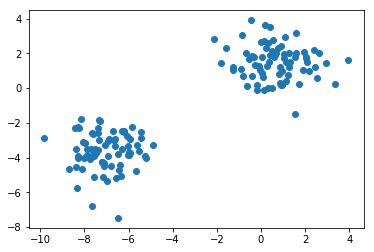

In [47]:
plt.scatter(X[:,0],X[:,1])

plt.show()

In [48]:
print(Y)

[0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 1]


In [49]:
model = KMeans(n_clusters=2)
labels1 = model.fit_predict(X)

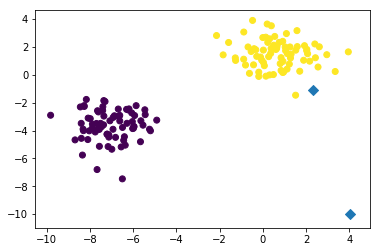

In [50]:
plt.scatter(X[:,0],X[:,1], c=labels1 ,alpha=1)

center_points=model.cluster_centers_
center_points_x = center_points[:,0]
center_points_y = center_points[:,1]

plt.scatter(ctp_x,ctp_y,marker='D',s=50)

plt.show()

# Thuc hanh bai tap 2

In [51]:
# Load dataset
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [52]:
model2 = KMeans(n_clusters=10)
labels = model2.fit_predict(digits.data)


In [53]:
df=pd.DataFrame({'labels':labels,'Truth labels':digits.target})
ct = pd.crosstab(df['labels'],df['Truth labels'])
print(ct)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   2    0    0    0    1  177    0    2    0
1               0   1   13  156    0    1    0    0    2    6
2               0  24  148    0    0    0    0    0    3    0
3               0   1    0    2    0  137    0    5    6    7
4               0  99    8    7    3    0    2    2  102    1
5             177   0    1    0    0    0    1    0    0    0
6               0  55    2    0    5    0    1    2    6   20
7               1   0    0    0  164    1    0    0    0    0
8               0   0    2   12    0   42    0    0   50  139
9               0   0    3    6    9    0    0  170    3    7


lables_predict: 3
 True:  5


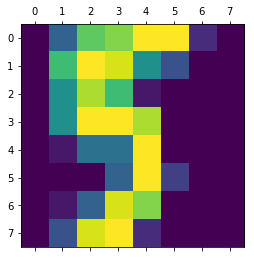

In [54]:
n=15
plt.matshow(digits.images[n])
print('lables_predict:',labels[n])
print(' True: ', digits.target[n])

In [55]:
# Spectral_clustering

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

# dist = DistanceMetric.get_metric('euclidean')
# graph=dist.pairwise(digits.data) 

graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)


In [56]:
df1=pd.DataFrame({'labels':label_spectral,'Truth labels':digits.target})
ct2=pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   0    1  148    0    0    0    0    6    2
1               0   0    0   16    0   20    2    0    7  133
2               0  58    5    5    1    0    0   16   40   36
3               0  36  115    4    0    0    0    0    1    0
4               0   0    0    4    0  157    0    0    3    3
5               1   0    0    0  163    2    0    0    0    0
6               0  86   53    5    5    0    7   10  101    1
7               0   0    2    1   11    0    0  153    3    2
8             177   0    1    0    1    1    0    0    0    3
9               0   2    0    0    0    2  172    0   13    0


lables_predict: 8
 True:  0


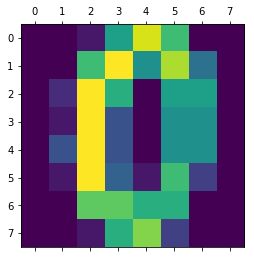

In [57]:
n=10
plt.matshow(digits.images[n])
print('lables_predict:',label_spectral[n])
print(' True: ', digits.target[n])


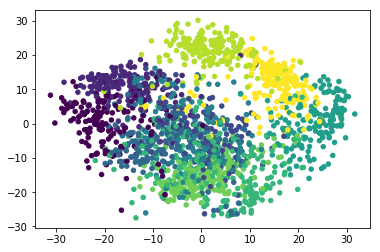

In [58]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
digitsData_to_2dimention = pca.fit_transform(digits.data)

plt.scatter(digitsData_to_2dimention[:,0], digitsData_to_2dimention[:,1],  c= label_spectral, s=20)
plt.show()

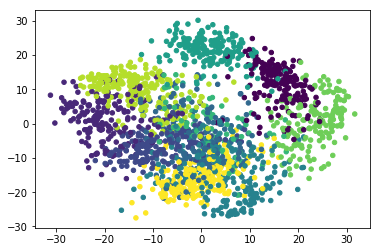

In [59]:
plt.scatter(digitsData_to_2dimention[:,0],digitsData_to_2dimention[:,1], c=labels,s=20)
plt.show()